In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm_notebook
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Loading MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

In [3]:
X = X.to_numpy()
y = y.to_numpy()
y = y.astype(int)

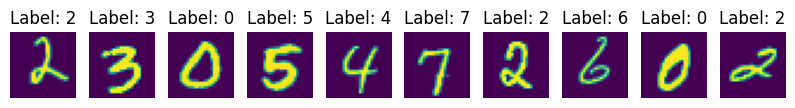

In [4]:
num_images = 10
indices = np.random.choice(X.shape[0], num_images, replace=False)
images = X[indices]
labels = y[indices]

plt.figure(figsize=(10, 2))
for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [26]:
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [27]:
y_train_pred = log_reg.predict(X_train_scaled)
y_train_prob = log_reg.predict_proba(X_train_scaled)

In [28]:
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)

In [29]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [30]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

In [31]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")

Train Accuracy: 0.9453
Train Precision: 0.9446
Train Recall: 0.9446
Train F1-Score: 0.9446
Train ROC AUC: 0.9968


In [32]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.9165
Test Precision: 0.9157
Test Recall: 0.9152
Test F1-Score: 0.9154
Test ROC AUC: 0.9905


# K Nearest Neighbours (KNN)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [34]:
y_train_pred = knn.predict(X_train_scaled)
y_train_prob = knn.predict_proba(X_train_scaled)

In [35]:
y_test_pred = knn.predict(X_test_scaled)
y_test_prob = knn.predict_proba(X_test_scaled)

In [36]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [37]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

In [38]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")

Train Accuracy: 0.9719
Train Precision: 0.9721
Train Recall: 0.9715
Train F1-Score: 0.9717
Train ROC AUC: 0.9997


In [39]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.9465
Test Precision: 0.9469
Test Recall: 0.9459
Test F1-Score: 0.9462
Test ROC AUC: 0.9868


# Decision Tree

In [40]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_train_pred = tree_classifier.predict(X_train_scaled)

In [42]:
y_test_pred = tree_classifier.predict(X_test_scaled)

In [43]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [44]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [45]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")

Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1-Score: 1.0000
Train ROC AUC: 0.9997


In [46]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC AUC: {train_roc_auc:.4f}")

Test Accuracy: 0.8697
Test Precision: 0.8680
Test Recall: 0.8679
Test F1-Score: 0.8679
Test ROC AUC: 0.9997


# Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_train_pred = random_forest.predict(X_train_scaled)
y_train_prob = random_forest.predict_proba(X_train_scaled)

In [49]:
y_test_pred = random_forest.predict(X_test_scaled)
y_test_prob = random_forest.predict_proba(X_test_scaled)

In [50]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [51]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

In [52]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")

Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1-Score: 1.0000
Train ROC AUC: 1.0000


In [53]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.9674
Test Precision: 0.9672
Test Recall: 0.9673
Test F1-Score: 0.9672
Test ROC AUC: 0.9989


# Gradient Boosting

In [18]:
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, l2_leaf_reg=3, depth=6, random_seed=42, logging_level='Silent')
catboost.fit(X_train_scaled, y_train, cat_features=[], eval_set=(X_test_scaled, y_test), verbose=False)

In [20]:
y_train_pred = catboost.predict(X_train_scaled)
y_train_prob = catboost.predict_proba(X_train_scaled)

In [21]:
y_test_pred = catboost.predict(X_test_scaled)
y_test_prob = catboost.predict_proba(X_test_scaled)

In [22]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_roc_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')

In [23]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

In [24]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")

Train Accuracy: 0.9562
Train Precision: 0.9560
Train Recall: 0.9559
Train F1-Score: 0.9559
Train ROC AUC: 0.9985


In [25]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.9490
Test Precision: 0.9491
Test Recall: 0.9485
Test F1-Score: 0.9487
Test ROC AUC: 0.9978


# Convolutional Neural Network

In [98]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [99]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

In [100]:
numpy_img = trainloader.dataset.train_data[0].numpy()

/home/stanislav/Desktop/DigitRecognizer/.venv/lib/python3.10/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [101]:
numpy_img.shape

(28, 28)

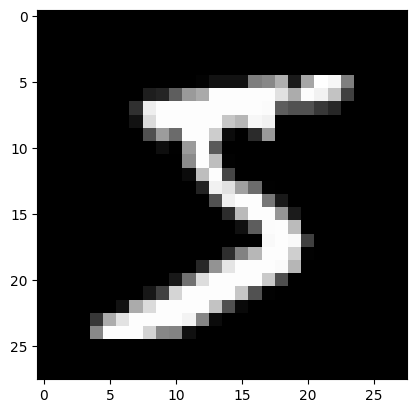

In [102]:
plt.imshow(numpy_img, cmap='gray');

In [103]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 4 * 4 * 16)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [104]:
net = SimpleConvNet().to(device)

In [105]:
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
losses = []

/tmp/ipykernel_25564/3266673763.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(2)):


  0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_25564/3266673763.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.047
[1,  4000] loss: 0.384
[1,  6000] loss: 0.305
[1,  8000] loss: 0.241
[1, 10000] loss: 0.205
[1, 12000] loss: 0.180
[1, 14000] loss: 0.159


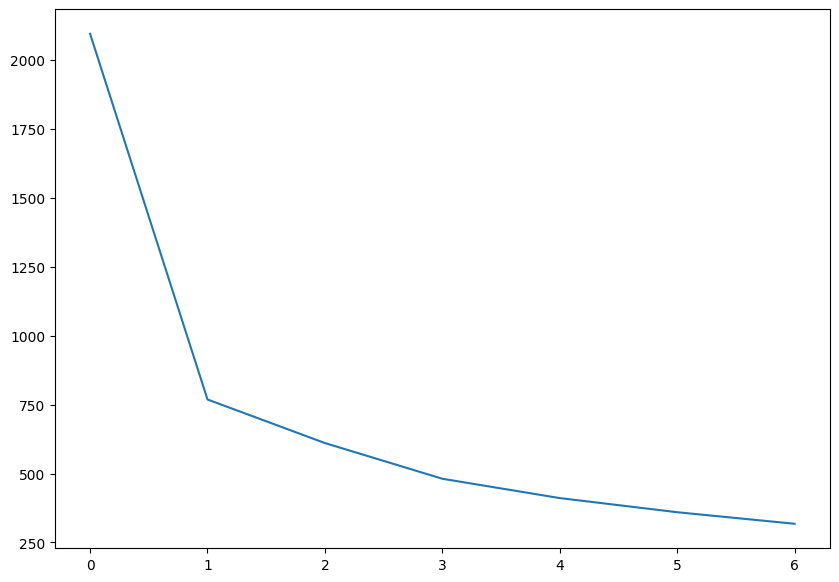

  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.132
[2,  4000] loss: 0.132
[2,  6000] loss: 0.129
[2,  8000] loss: 0.112
[2, 10000] loss: 0.108
[2, 12000] loss: 0.108
[2, 14000] loss: 0.106
Обучение закончено


In [106]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

for epoch in tqdm_notebook(range(2)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss)
            running_loss = 0.0

    ax.clear()
    ax.plot(np.arange(len(losses)), losses)
    plt.show()

print('Обучение закончено')

In [108]:
y_true = []
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_true.extend(labels.numpy())  # Собираем истинные метки
        y_pred.extend(torch.argmax(net(images.to(device)), dim=1).cpu().numpy())  # Собираем предсказанные метки

# Преобразуем списки в numpy arrays для использования в функциях scikit-learn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [109]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

In [110]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9748
Precision: 0.9750528740543025
Recall: 0.9747403852907123
F1-score: 0.9747750622976652


In [112]:
torch.save(net.state_dict(), 'model_weights.pth')